In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_USA=pd.read_csv('/content/US_Accidents_Dec21_Cleaned.csv')

<ipython-input-2-6e97a951f5ce>:1: DtypeWarning: Columns (26,27,28,29,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df_USA=pd.read_csv('/content/US_Accidents_Dec21_Cleaned.csv')


In [3]:
df_USA.head()

,Unnamed: 0,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Amenity,Crossing,Junction,Station,Stop,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,Outerbelt E,...,False,False,False,False,False,False,Night,Night,Night,Night
1,4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,0.500,At Mitchell Ave/Exit 6 - Accident.,I-75 S,...,False,False,False,False,False,False,Day,Day,Day,Day
2,5,A-6,2,2016-02-08 08:16:57,2016-02-08 14:16:57,39.063240,-84.032430,1.427,At Dela Palma Rd - Accident.,State Route 32,...,False,False,False,False,False,True,Day,Day,Day,Day
3,6,A-7,2,2016-02-08 08:15:41,2016-02-08 14:15:41,39.775650,-84.186030,0.227,At OH-4/Exit 54 - Accident.,I-75 S,...,False,False,False,False,False,False,Day,Day,Day,Day
4,7,A-8,2,2016-02-08 11:51:46,2016-02-08 17:51:46,41.375310,-81.820170,0.521,At Bagley Rd/Exit 235 - Accident.,I-71 S,...,False,False,True,False,False,False,Day,Day,Day,Day


In [4]:
df_USA.columns

Index(['Unnamed: 0', 'ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Description', 'Street', 'Side', 'City',
       'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Amenity', 'Crossing', 'Junction', 'Station',
       'Stop', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

In [5]:
df_USA.dtypes.value_counts()

object     26
float64     8
int64       2
dtype: int64

In [6]:
df_USA.shape

(38557, 36)

In [7]:
df_USA.describe()

,Unnamed: 0,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
count,38557.000000,38557.000000,38557.000000,38557.000000,38557.000000,38557.000000,38557.000000,38557.000000,38557.000000,38556.00000
mean,23126.993879,2.389138,36.367631,-96.331337,0.738084,57.340358,65.155303,30.032475,9.170463,9.35506
std,13363.889816,0.651424,4.922072,14.500359,1.921983,22.301529,20.410829,0.260248,2.997668,7.49517
min,0.000000,2.000000,25.237495,-123.526160,0.000000,-18.000000,4.000000,20.670000,0.000000,0.00000
25%,11697.000000,2.000000,32.825453,-102.818890,0.173000,39.900000,50.000000,29.910000,10.000000,5.80000
50%,23066.000000,2.000000,36.202370,-95.153546,0.417000,62.100000,66.000000,30.010000,10.000000,8.10000
75%,34774.000000,3.000000,40.193360,-85.248464,0.712000,73.900000,82.000000,30.150000,10.000000,11.50000
max,46290.000000,4.000000,48.125360,-68.499932,151.525000,129.200000,100.000000,30.920000,111.000000,822.80000


In [8]:
df_USA.State.unique

<bound method Series.unique of 0        OH
1        OH
2        OH
3        OH
4        OH
         ..
38552    IL
38553    GA
38554    MS
38555    GA
38556    IL
Name: State, Length: 38557, dtype: object>

In [9]:
df1=df_USA[df_USA['State']=='CA']

In [10]:
df1['IDD'] = df1['ID'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

<ipython-input-10-aae0ba6fa09f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['IDD'] = df1['ID'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)


In [12]:
df1.head()

,Unnamed: 0,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Crossing,Junction,Station,Stop,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,IDD
880,990,A-991,3,2016-03-22 20:07:32,2016-03-23 02:07:32,37.881943,-122.307987,0.276,At I-80/I-580 Northern Split - Accident.,I-580 W,...,False,True,False,False,False,Night,Night,Day,Day,991
881,991,A-992,2,2016-03-22 21:40:18,2016-03-23 03:40:18,37.881038,-122.307788,0.170,At I-80/I-580 Northern Split - Accident.,I-580 W,...,False,False,False,False,False,Night,Night,Night,Night,992
882,992,A-993,2,2016-03-22 21:36:42,2016-03-23 03:36:42,38.518811,-121.101664,0.000,Between Latrobe Rd/Indio Dr and Latrobe Rd - A...,Latrobe Rd,...,False,False,False,False,False,Night,Night,Night,Night,993
883,993,A-994,2,2016-03-22 21:36:42,2016-03-23 03:36:42,38.518811,-121.101664,0.000,Between Latrobe Rd and Latrobe Rd/Indio Dr - A...,Latrobe Rd,...,False,False,False,False,False,Night,Night,Night,Night,994
884,994,A-995,2,2016-03-23 03:48:55,2016-03-23 09:48:55,36.990300,-119.711460,0.012,At North Fork Rd - Overturned vehicle.,N Friant Rd,...,False,False,False,True,False,Night,Night,Night,Night,995


In [14]:
df1.shape

(8824, 37)

In [15]:
df1.columns

Index(['Unnamed: 0', 'ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Description', 'Street', 'Side', 'City',
       'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Amenity', 'Crossing', 'Junction', 'Station',
       'Stop', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight', 'IDD'],
      dtype='object')

In [16]:
df1.duplicated().sum()

0

In [18]:
d1f=df1.dropna(subset=['Pressure(in)'])

In [19]:
df1=df1.dropna(subset=['Temperature(F)', 'Humidity(%)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition'])

In [20]:
df1.shape

(8824, 37)

In [21]:
df1.isna().sum()/len(df1)*100

Unnamed: 0               0.0
ID                       0.0
Severity                 0.0
Start_Time               0.0
End_Time                 0.0
Start_Lat                0.0
Start_Lng                0.0
Distance(mi)             0.0
Description              0.0
Street                   0.0
Side                     0.0
City                     0.0
County                   0.0
State                    0.0
Zipcode                  0.0
Country                  0.0
Timezone                 0.0
Airport_Code             0.0
Weather_Timestamp        0.0
Temperature(F)           0.0
Humidity(%)              0.0
Pressure(in)             0.0
Visibility(mi)           0.0
Wind_Direction           0.0
Wind_Speed(mph)          0.0
Weather_Condition        0.0
Amenity                  0.0
Crossing                 0.0
Junction                 0.0
Station                  0.0
Stop                     0.0
Traffic_Signal           0.0
Sunrise_Sunset           0.0
Civil_Twilight           0.0
Nautical_Twili

In [22]:
df1=df1.dropna(subset=['City','Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'])

In [23]:
df1.isna().sum()/len(df1)*100

Unnamed: 0               0.0
ID                       0.0
Severity                 0.0
Start_Time               0.0
End_Time                 0.0
Start_Lat                0.0
Start_Lng                0.0
Distance(mi)             0.0
Description              0.0
Street                   0.0
Side                     0.0
City                     0.0
County                   0.0
State                    0.0
Zipcode                  0.0
Country                  0.0
Timezone                 0.0
Airport_Code             0.0
Weather_Timestamp        0.0
Temperature(F)           0.0
Humidity(%)              0.0
Pressure(in)             0.0
Visibility(mi)           0.0
Wind_Direction           0.0
Wind_Speed(mph)          0.0
Weather_Condition        0.0
Amenity                  0.0
Crossing                 0.0
Junction                 0.0
Station                  0.0
Stop                     0.0
Traffic_Signal           0.0
Sunrise_Sunset           0.0
Civil_Twilight           0.0
Nautical_Twili

In [24]:
df1['Weather_Condition'].value_counts()

Clear                           3987
Mostly Cloudy                   1204
Overcast                        1178
Partly Cloudy                   1034
Scattered Clouds                 971
Haze                             205
Light Rain                       121
Fair                              67
Cloudy                            15
Rain                              12
Snow                               5
Smoke                              5
Light Drizzle                      4
Rain Showers                       3
Heavy Drizzle                      3
Fog                                2
Light Snow                         2
Heavy Rain                         2
Patches of Fog                     1
Light Thunderstorms and Rain       1
Light Rain Showers                 1
Mist                               1
Name: Weather_Condition, dtype: int64

In [25]:
df1.Side.unique()

array(['R', 'L'], dtype=object)

In [26]:
df_cat=df1.select_dtypes('object')
df_num=df1.select_dtypes(np.number)
df_cat=df_cat.drop('ID',axis=1)

In [27]:
df_cat=df1.select_dtypes('object')
col_name=[]
length=[]

for i in df_cat.columns:
    col_name.append(i)
    length.append(len(df_cat[i].unique()))
df_2=pd.DataFrame(zip(col_name,length),columns=['feature','count_of_unique_values'])
df_2

,feature,count_of_unique_values
0,ID,8824
1,Start_Time,7446
2,End_Time,7433
3,Description,4424
4,Street,1443
5,Side,2
6,City,556
7,County,45
8,State,1
9,Zipcode,1592


In [28]:
df1.drop(['Description','Zipcode','Weather_Timestamp'],axis=1,inplace=True)

In [29]:
del df1['Airport_Code']

In [30]:
df_num.columns

Index(['Unnamed: 0', 'Severity', 'Start_Lat', 'Start_Lng', 'Distance(mi)',
       'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Speed(mph)', 'IDD'],
      dtype='object')

In [31]:
len(df_num.columns)

11

In [32]:
df_cat.columns

Index(['ID', 'Start_Time', 'End_Time', 'Description', 'Street', 'Side', 'City',
       'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Wind_Direction', 'Weather_Condition', 'Amenity',
       'Crossing', 'Junction', 'Station', 'Stop', 'Traffic_Signal',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [34]:
len(df1['City'].unique())

556

In [35]:
df_num=df1.select_dtypes(np.number)
col_name=[]
length=[]

for i in df_num.columns:
    col_name.append(i)
    length.append(len(df_num[i].unique()))
df_2=pd.DataFrame(zip(col_name,length),columns=['feature','count_of_unique_values'])
df_2

,feature,count_of_unique_values
0,Unnamed: 0,8824
1,Severity,3
2,Start_Lat,6081
3,Start_Lng,6181
4,Distance(mi),1507
5,Temperature(F),222
6,Humidity(%),95
7,Pressure(in),120
8,Visibility(mi),20
9,Wind_Speed(mph),48


<Axes: >

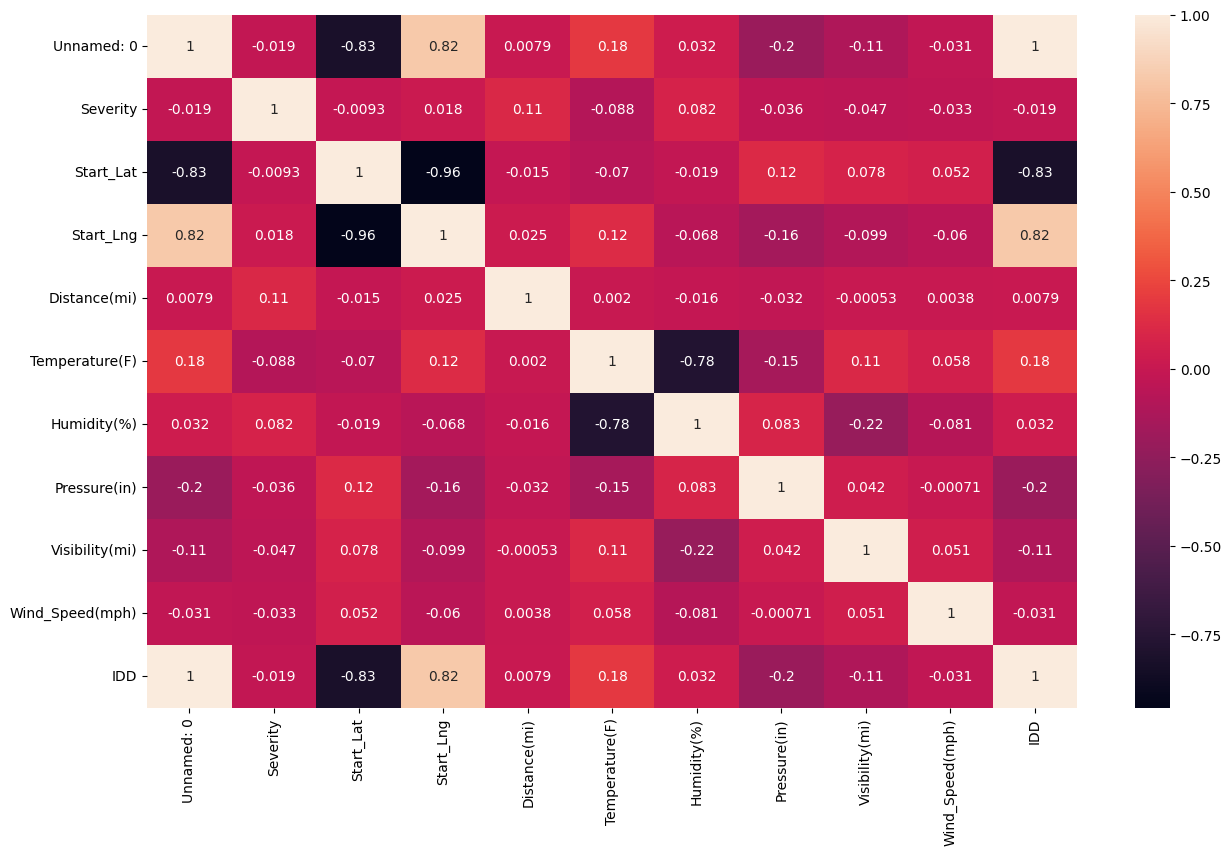

In [36]:
plt.figure(figsize=(15 ,9))
sns.heatmap(df_num.corr() , annot=True)

In [37]:
cities = df1['City'].unique()
len(cities)

556

In [38]:
accidents_by_cities = df1['City'].value_counts()
accidents_by_cities

Los Angeles       755
San Diego         379
Sacramento        360
San Jose          301
Oakland           179
                 ... 
Portola Valley      1
Jackson             1
Soledad             1
San Gregorio        1
Adelanto            1
Name: City, Length: 556, dtype: int64

In [39]:
accidents_by_cities[:10]

Los Angeles      755
San Diego        379
Sacramento       360
San Jose         301
Oakland          179
San Francisco    148
Long Beach       141
Riverside        128
Corona           109
Anaheim          109
Name: City, dtype: int64

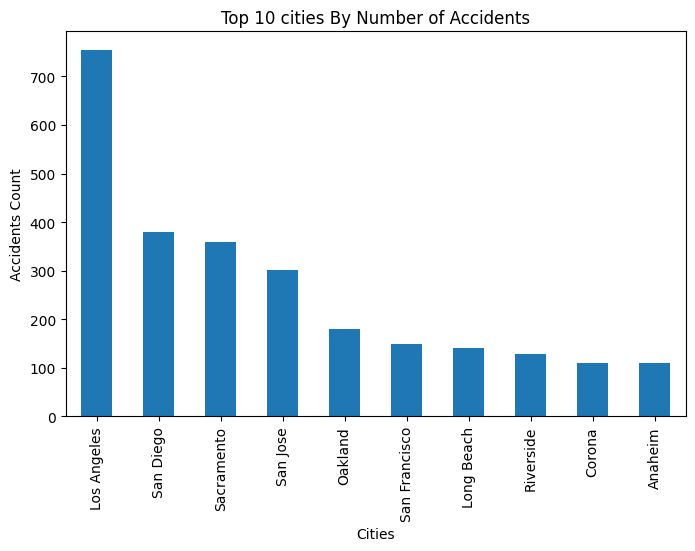

In [40]:
fig, ax = plt.subplots(figsize=(8,5))
accidents_by_cities[:10].plot(kind='bar')
ax.set(title = 'Top 10 cities By Number of Accidents',
       xlabel = 'Cities',
       ylabel = 'Accidents Count')
plt.show()

In [41]:
accidents_severity = df1.groupby('Severity').count()['ID']
accidents_severity

Severity
2    7588
3     978
4     258
Name: ID, dtype: int64

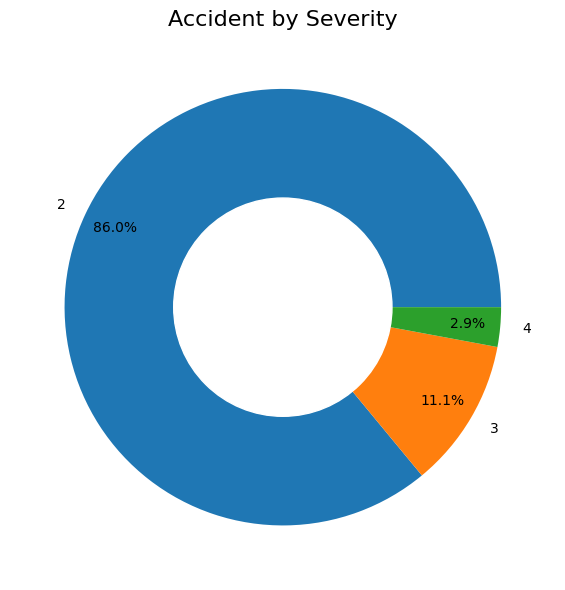

In [46]:
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))
label = [2,3,4]
plt.pie(accidents_severity, labels=label,
        autopct='%1.1f%%', pctdistance=0.85)
circle = plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
ax.set_title("Accident by Severity",fontdict={'fontsize': 16})
plt.tight_layout()
plt.show()

In [47]:
df1['Start_Time'].dtypes

dtype('O')

In [48]:
df1['End_Time'].dtypes


dtype('O')

In [49]:
df1 = df1.astype({'Start_Time': 'datetime64[ns]', 'End_Time': 'datetime64[ns]'})
df1['Start_Time'].dtypes

dtype('<M8[ns]')

In [50]:
df1['Start_Time'][2408]

Timestamp('2016-04-29 17:32:55')

In [51]:
df1['End_Time'][2408]

Timestamp('2016-04-29 23:32:55')

In [52]:
df1['start_date'] = [d.date() for d in df1['Start_Time']]
df1['start_time'] = [d.time() for d in df1['Start_Time']]

In [53]:
df1['end_date'] = [d.date() for d in df1['End_Time']]
df1['end_time'] = [d.time() for d in df1['End_Time']]

In [54]:
df1['end_time']

880     02:07:32
881     03:40:18
882     03:36:42
883     03:36:42
884     09:48:55
          ...   
9701    18:44:32
9702    18:44:32
9703    20:35:53
9704    20:44:48
9705    20:50:04
Name: end_time, Length: 8824, dtype: object

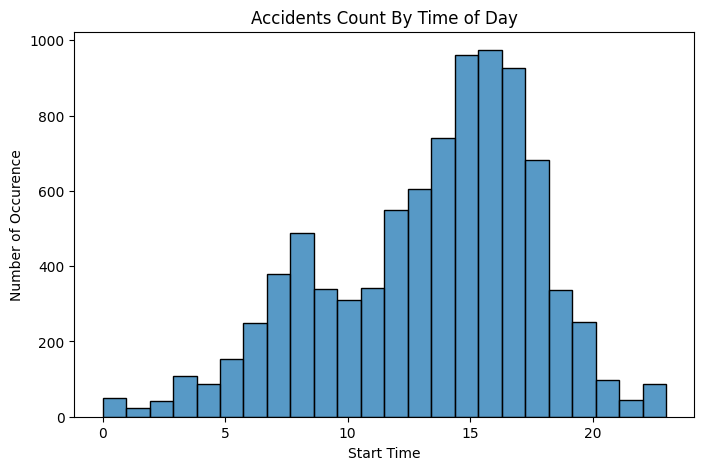

In [55]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(df1['Start_Time'].dt.hour, bins = 24)

plt.xlabel("Start Time")
plt.ylabel("Number of Occurence")
plt.title('Accidents Count By Time of Day')

plt.show()

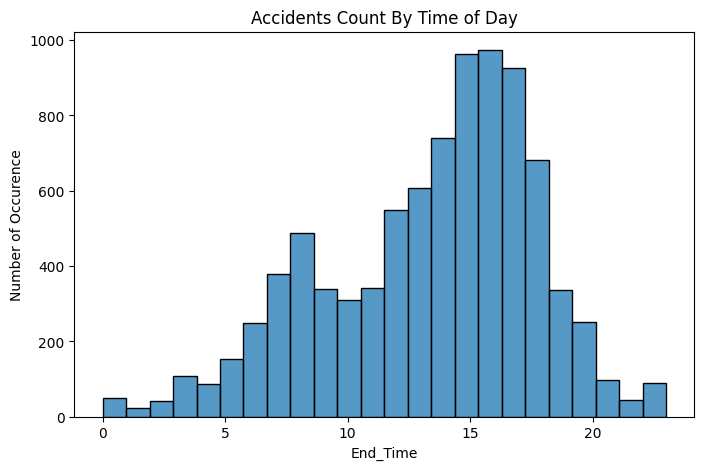

In [56]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(df1['Start_Time'].dt.hour, bins = 24)

plt.xlabel("End_Time")
plt.ylabel("Number of Occurence")
plt.title('Accidents Count By Time of Day')

plt.show()

In [57]:
del df1['Start_Time']
del df1['End_Time']

In [58]:
%matplotlib inline
import os

In [67]:
df1.head()


,Unnamed: 0,ID,Severity,Start_Lat,Start_Lng,Distance(mi),Street,Side,City,County,...,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,IDD,start_date,start_time,end_date,end_time
880,990,A-991,3,37.881943,-122.307987,0.276,I-580 W,R,Berkeley,Alameda,...,False,Night,Night,Day,Day,991,2016-03-22,20:07:32,2016-03-23,02:07:32
881,991,A-992,2,37.881038,-122.307788,0.170,I-580 W,R,Berkeley,Alameda,...,False,Night,Night,Night,Night,992,2016-03-22,21:40:18,2016-03-23,03:40:18
882,992,A-993,2,38.518811,-121.101664,0.000,Latrobe Rd,R,Sloughhouse,Sacramento,...,False,Night,Night,Night,Night,993,2016-03-22,21:36:42,2016-03-23,03:36:42
883,993,A-994,2,38.518811,-121.101664,0.000,Latrobe Rd,R,Sloughhouse,Sacramento,...,False,Night,Night,Night,Night,994,2016-03-22,21:36:42,2016-03-23,03:36:42
884,994,A-995,2,36.990300,-119.711460,0.012,N Friant Rd,R,Friant,Fresno,...,False,Night,Night,Night,Night,995,2016-03-23,03:48:55,2016-03-23,09:48:55


In [61]:
df1.groupby('Severity').count()['IDD']

Severity
2    7588
3     978
4     258
Name: IDD, dtype: int64

<Axes: xlabel='Severity', ylabel='Start_Lat'>

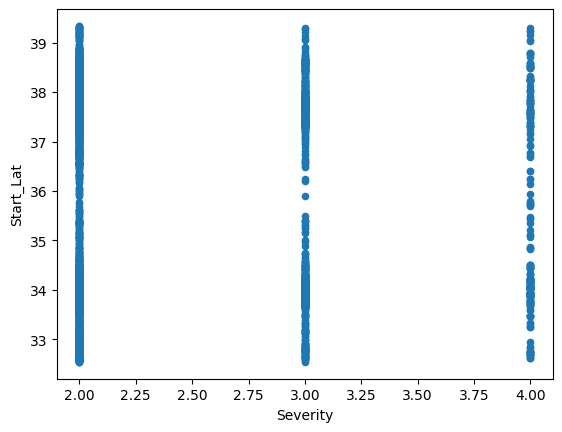

In [74]:
df_num.plot(kind='scatter', y='Start_Lat', x='Severity')